In [1]:
## Check the optimal duration of STRB1

# 1 - Graph average waveforms for original settings
# 2 - Graph average waveform for each step
# 3 - Zoom in on glitches
# 4 - Graph the value of each average waveform at 22, 45, 56, 75 and 90
# 5 - Find the max and min values for each time for each ASIC
# 6 - Plot data spikes for each step for each ASIC
# 7 - Repeat 2-4 for Odd blocks
# 8 - Repeat 2-4 for Event blocks

# Conclusion - The best STRB1 duration seems to be betwee 3-8
# The duration of STRB1 does not seem to affect data spikes

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

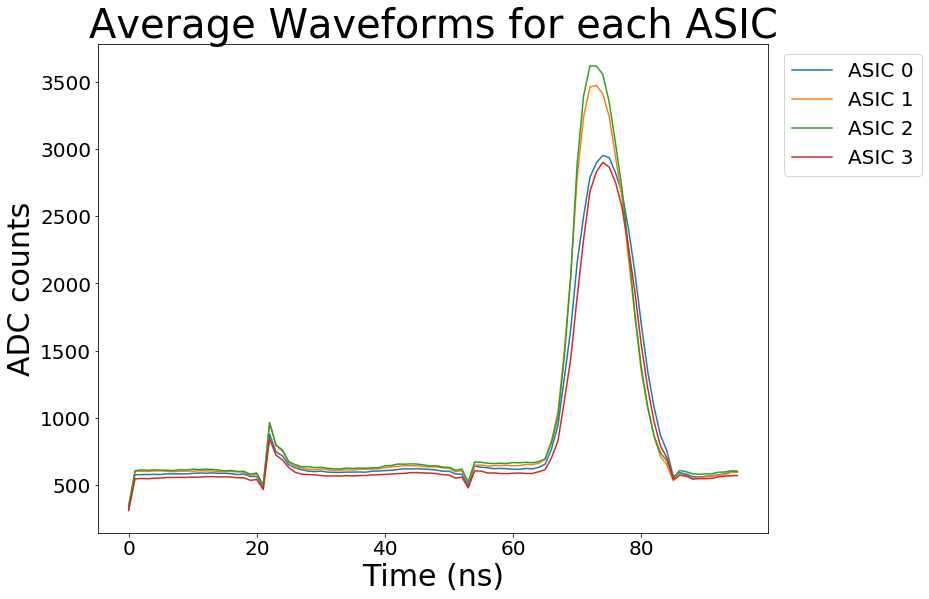

In [4]:
# Graph average waveforms for original settings

Original = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB1 Duration/sampleFileLarge_run320145ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        waveforms.append(data[event][shift: (shift + 96)])
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(5000):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    Original.append(avg_waveform)
    plt.plot(avg_waveform, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveforms for each ASIC')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

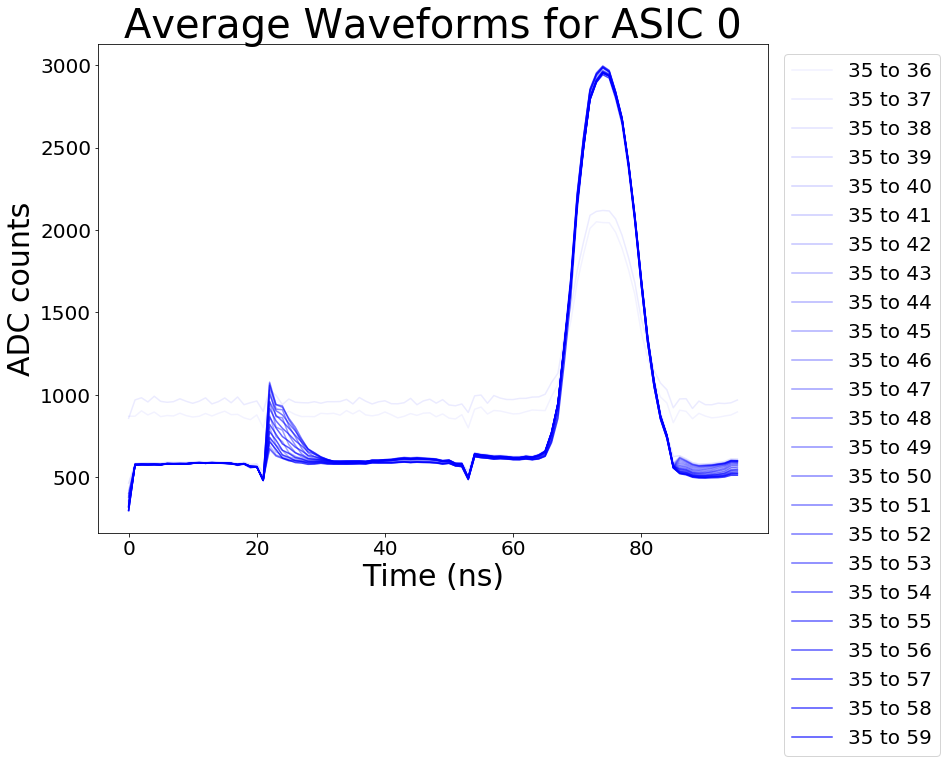

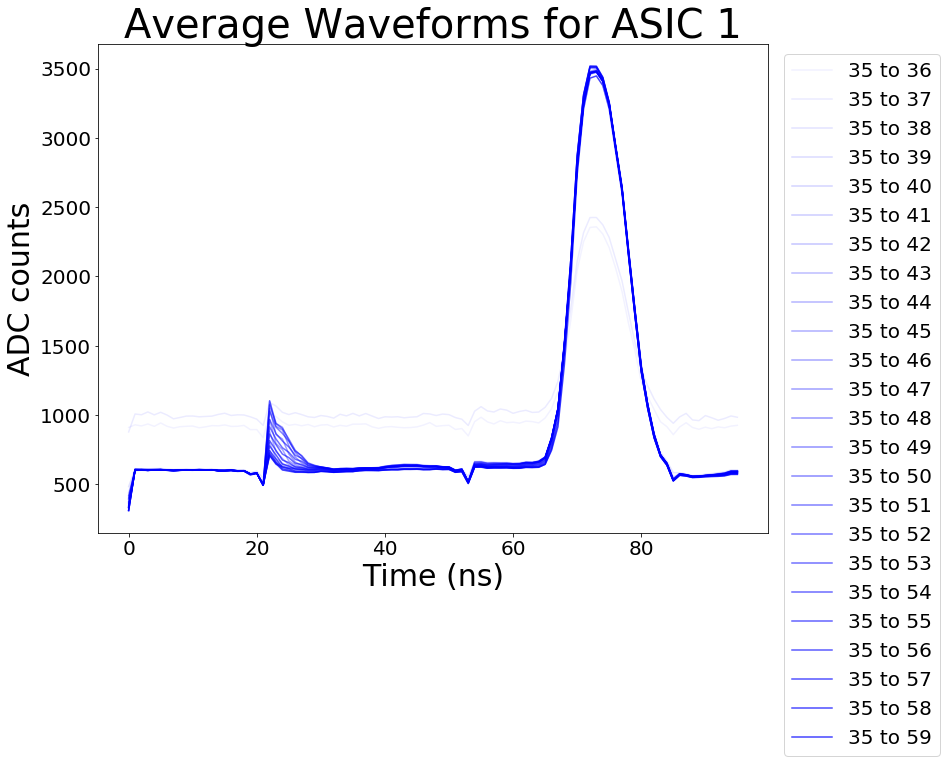

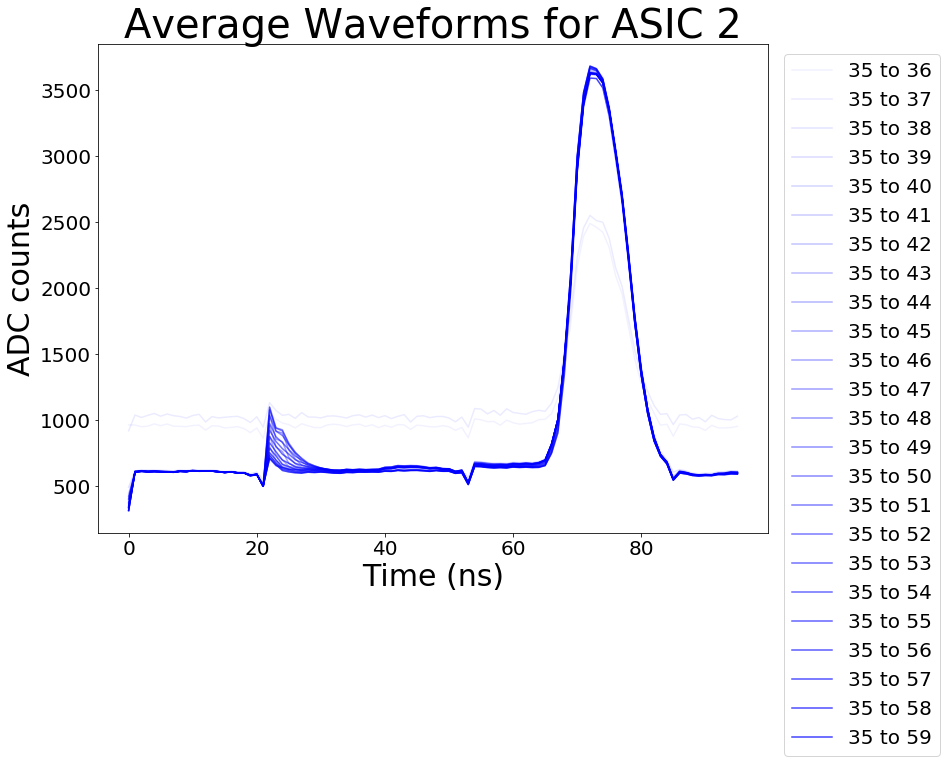

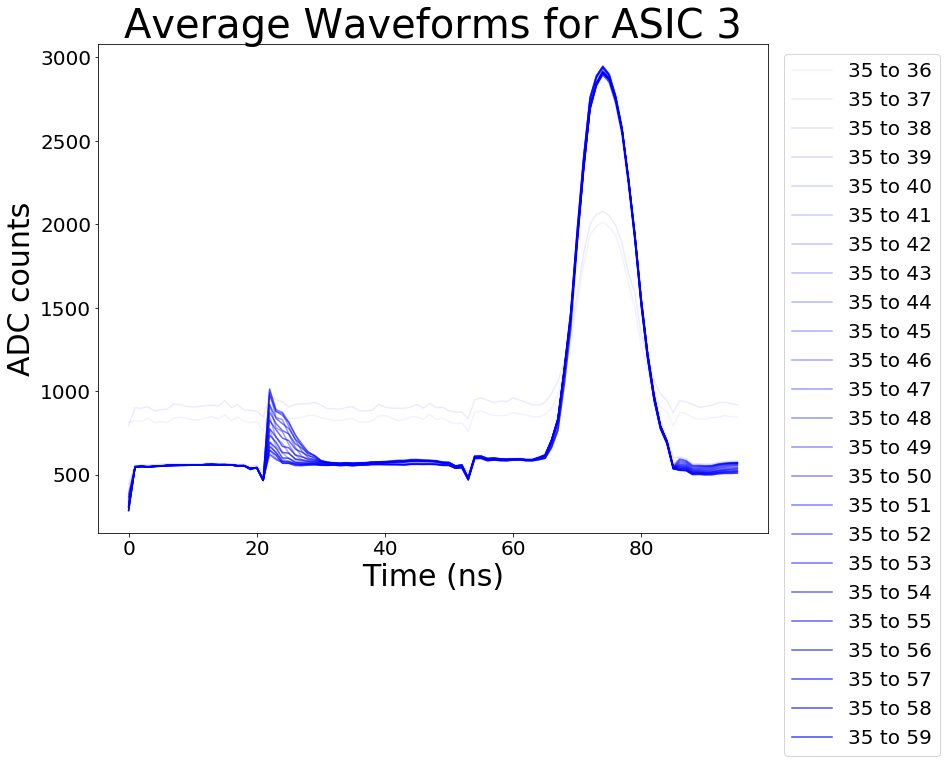

In [5]:
# Graph average waveform for each step

STRB1 = []
for ASIC in range(4):
    runs = []
    end_value = 36
    color = 0.05
    for run in range(320135,320159):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB1 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '35 to ' + str(end_value), color = 'b', alpha = color)
        end_value = end_value + 1
        color = color + 0.03
    STRB1.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

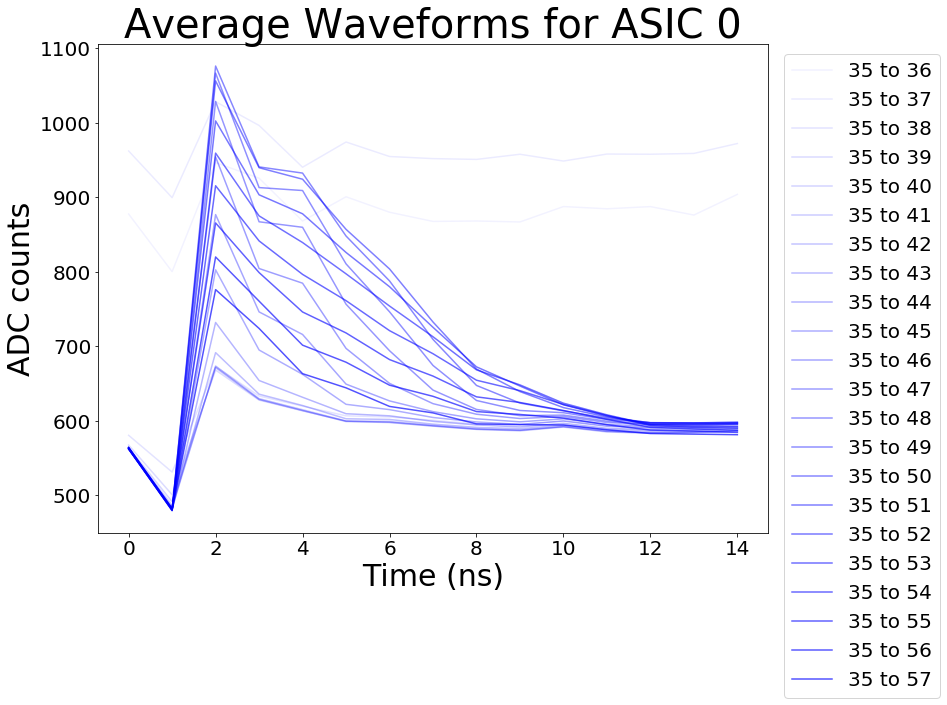

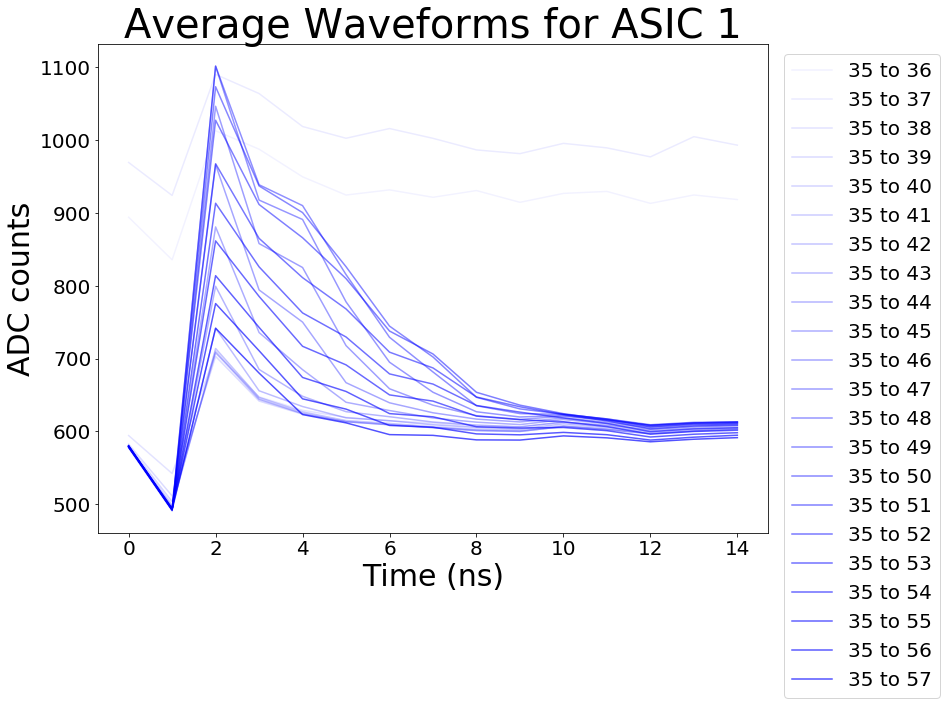

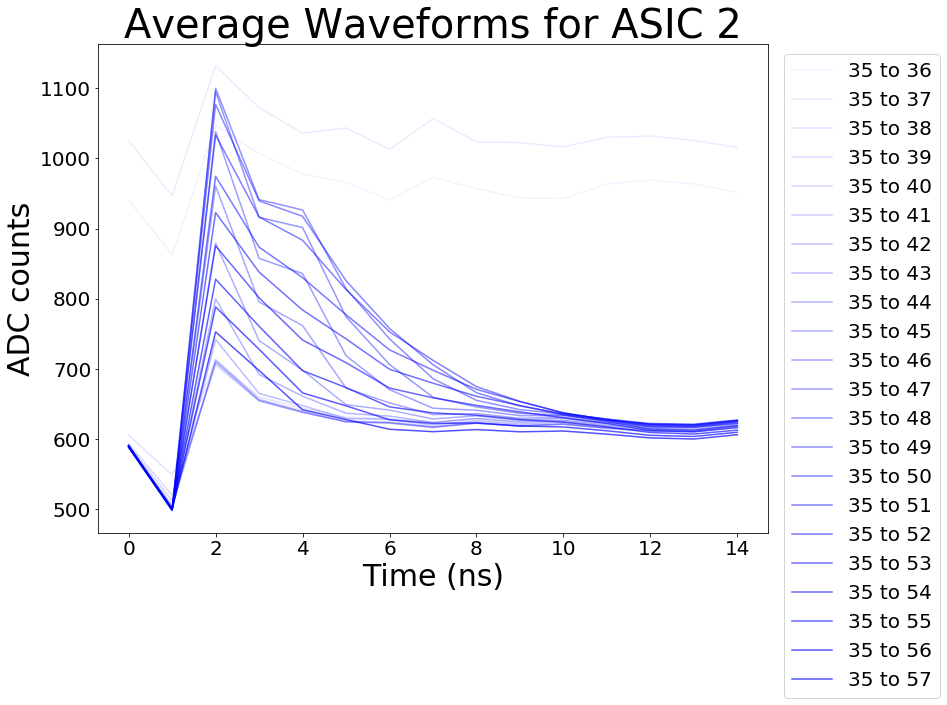

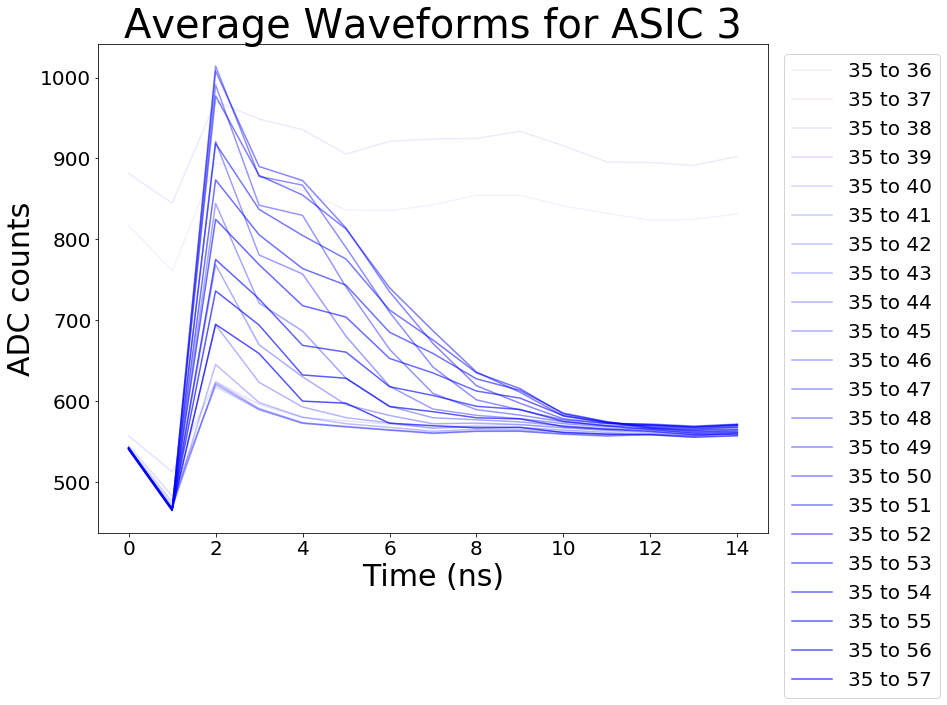

In [10]:
# Zoom in on glitch

for ASIC in range(4):
    end_value = 36
    color = 0.05
    for run in range(22):
        plt.plot(STRB1[ASIC][run][20:35], label = '35 to ' + str(end_value), color = 'b', alpha = color)
        end_value = end_value + 1
        color = color + 0.03
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [10]:
print(shape(STRB1))

(4, 24, 96)


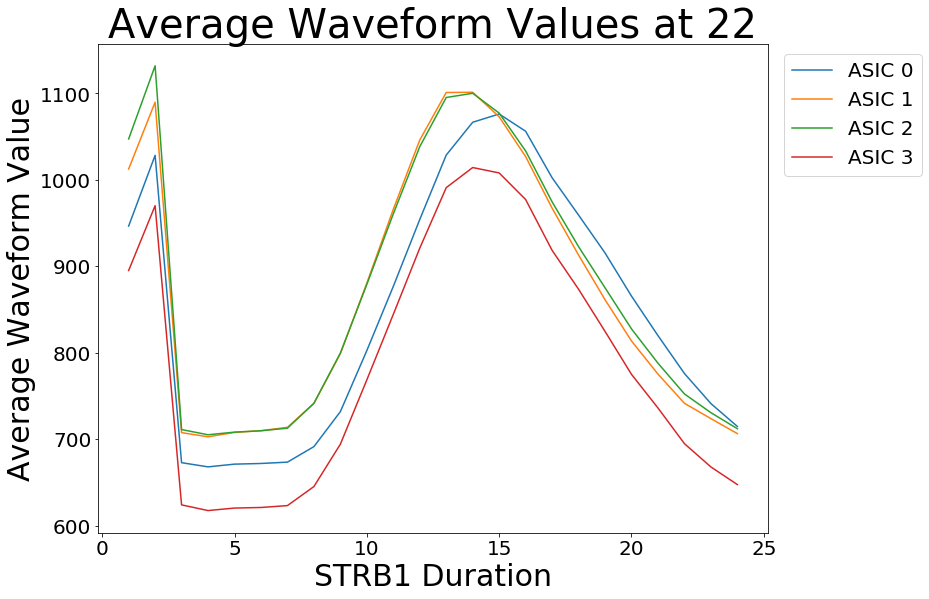

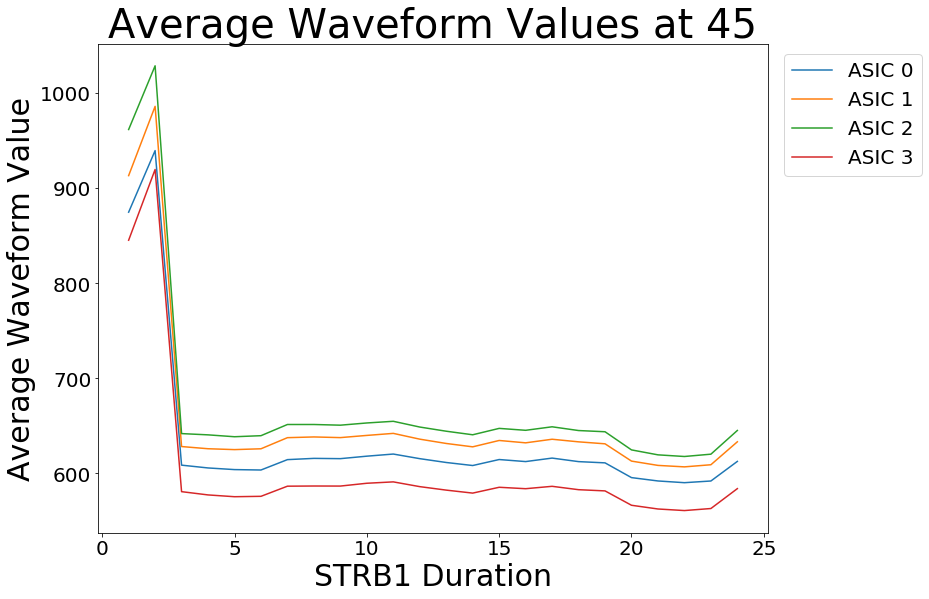

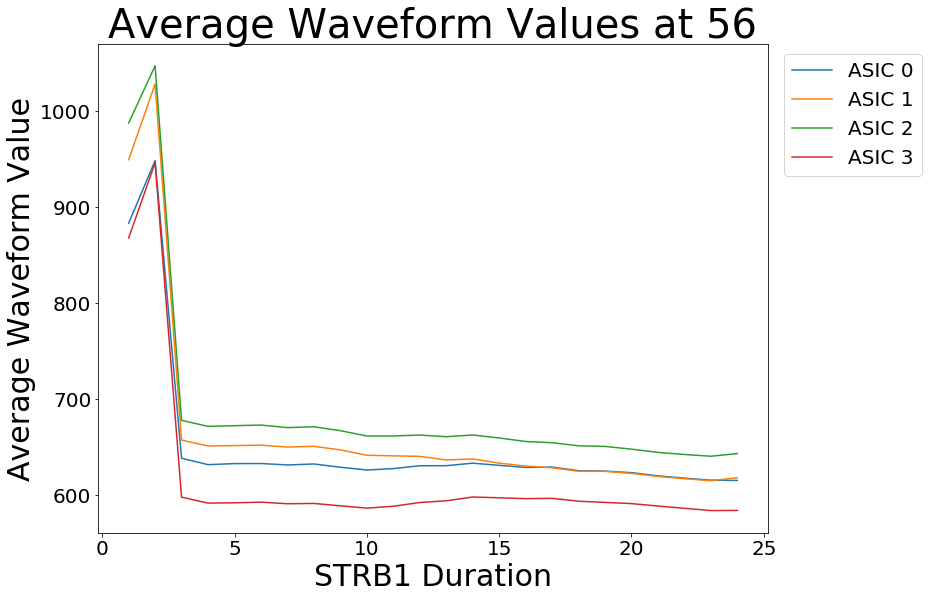

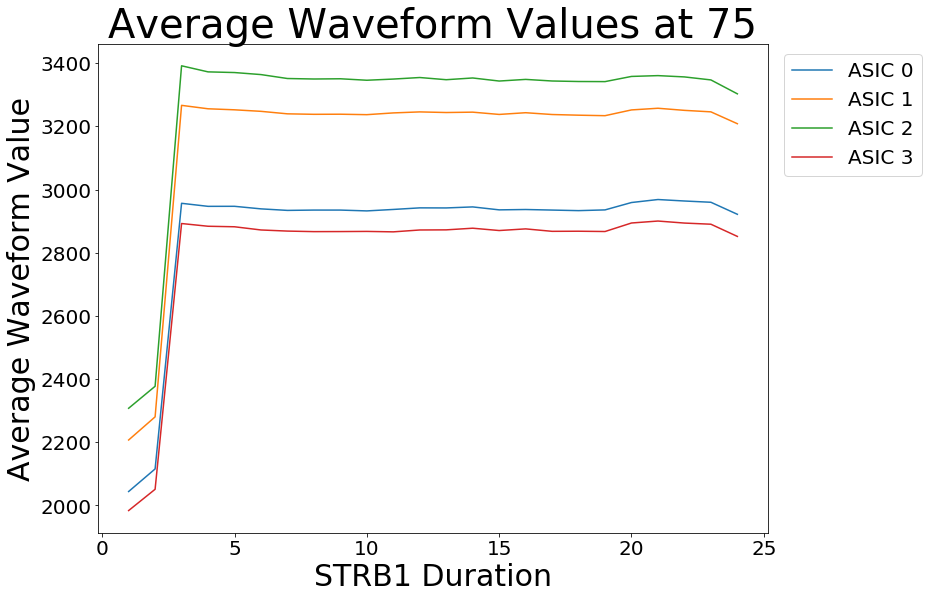

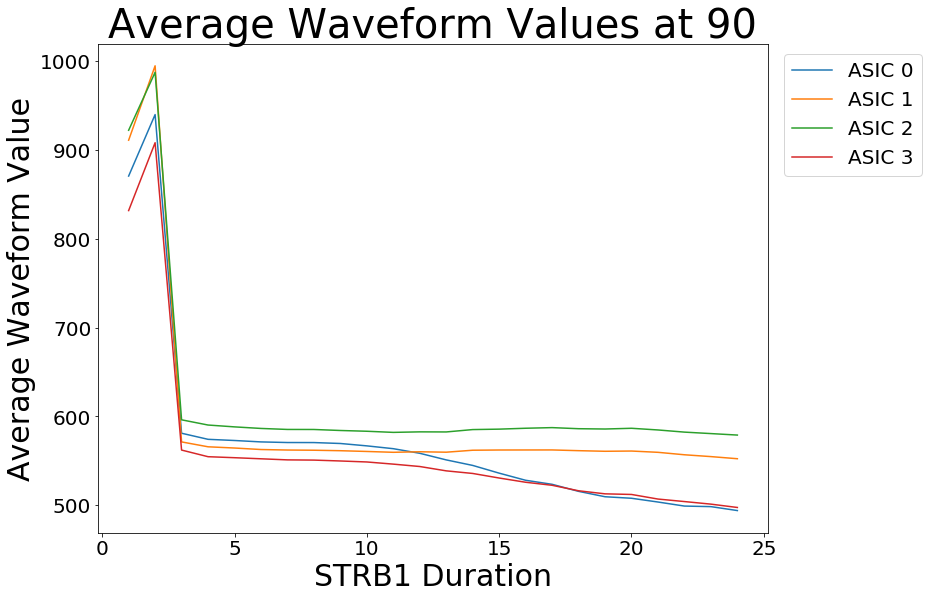

In [18]:
# Graph the value of each average waveform at 22, 45, 56, 75, and 90
durations = [i for i in range(1,25)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 22')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1[ASIC][run][45])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 45')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1[ASIC][run][56])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 56')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()


# at value 75
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 75')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 90')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

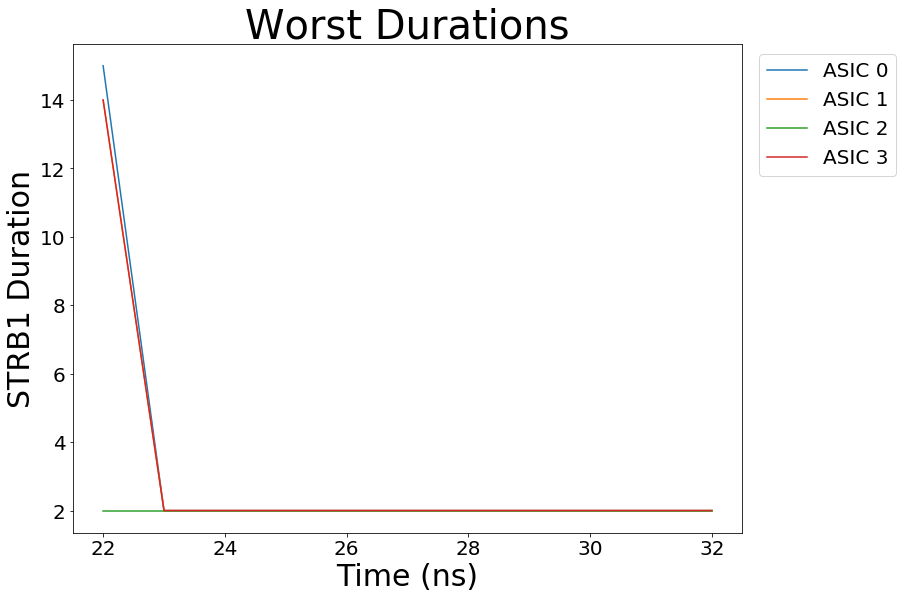

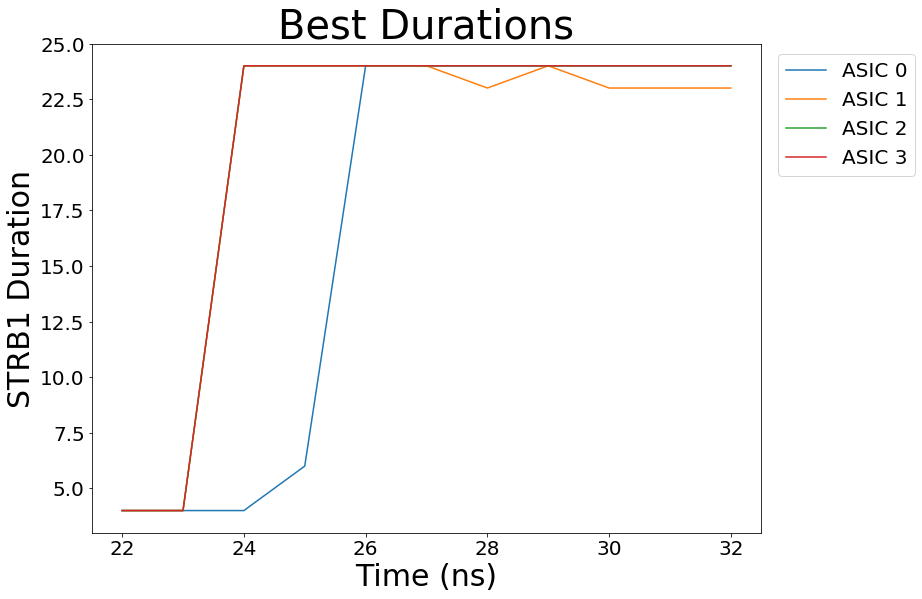

In [8]:
# Find the max and min values for each value for each ASIC

times = [i for i in range(22,33)]
end = [i for i in range(1,25)]

for ASIC in range(4):
    maxes = []
    for time in range(22,33):
        value = []
        for run in range(24):
            value.append(STRB1[ASIC][run][time])
        maxes.append(end[value.index(max(value))])
    plt.plot(times,maxes, label = 'ASIC ' + str(ASIC))
plt.title('Worst Durations')
plt.xlabel('Time (ns)')
plt.ylabel('STRB1 Duration')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

for ASIC in range(4):
    mins = []
    for time in range(22,33):
        value = []
        for run in range(24):
            value.append(STRB1[ASIC][run][time])
        mins.append(end[value.index(min(value))])
    plt.plot(times,mins, label = 'ASIC ' + str(ASIC))
plt.title('Best Durations')
plt.xlabel('Time (ns)')
plt.ylabel('STRB1 Duration')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [9]:
## Data Spikes in STRB1 Duration Scan ##

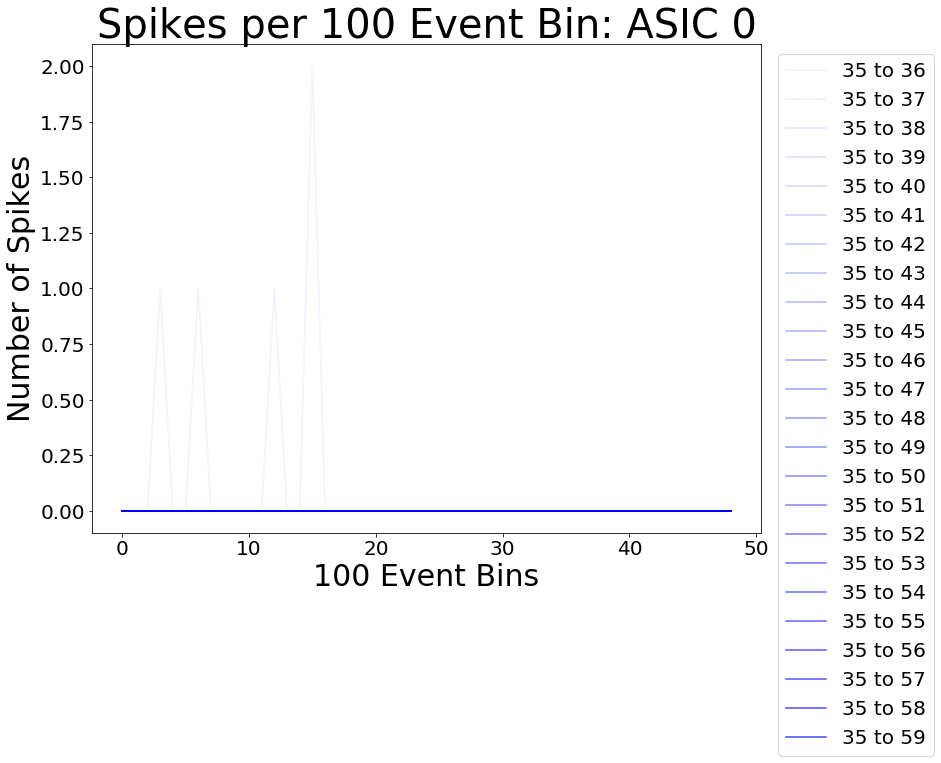

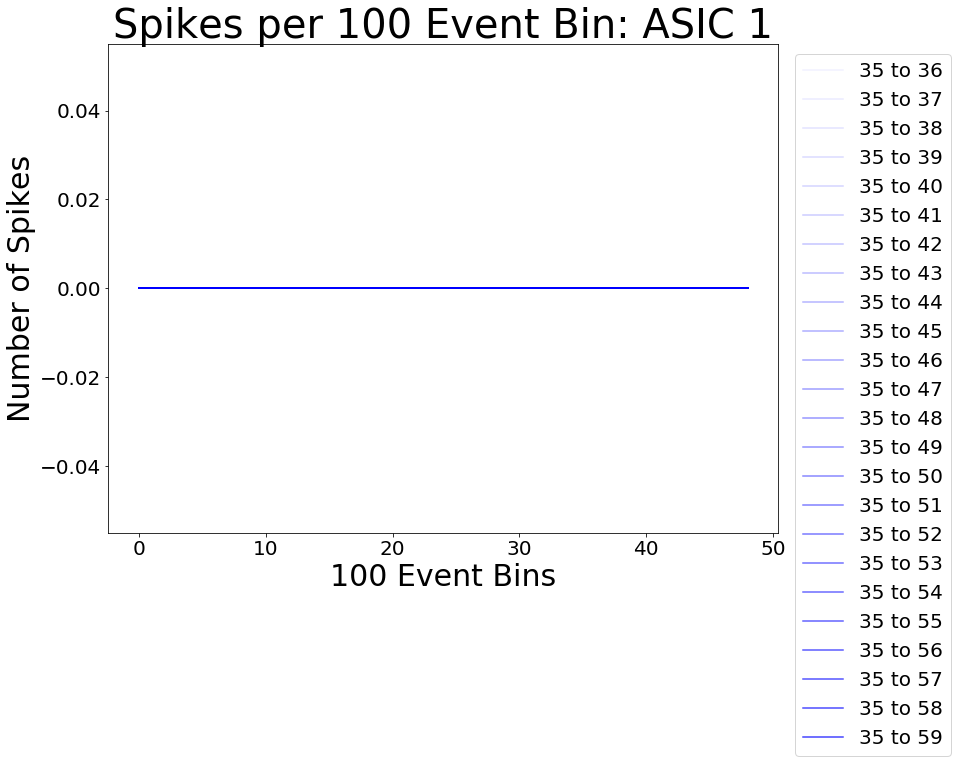

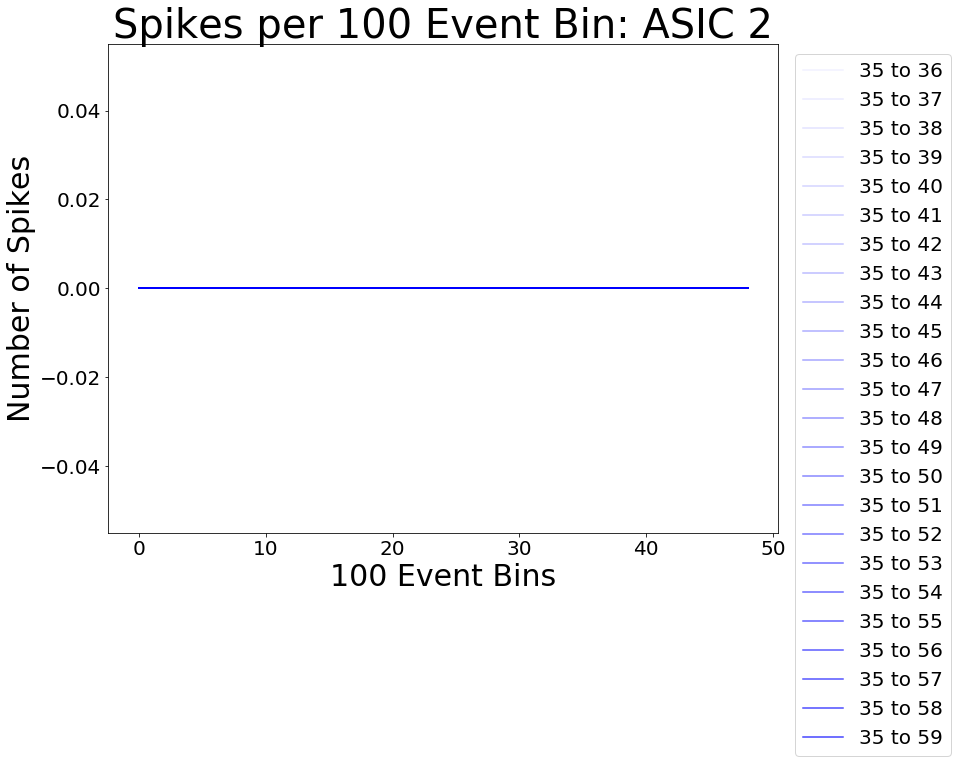

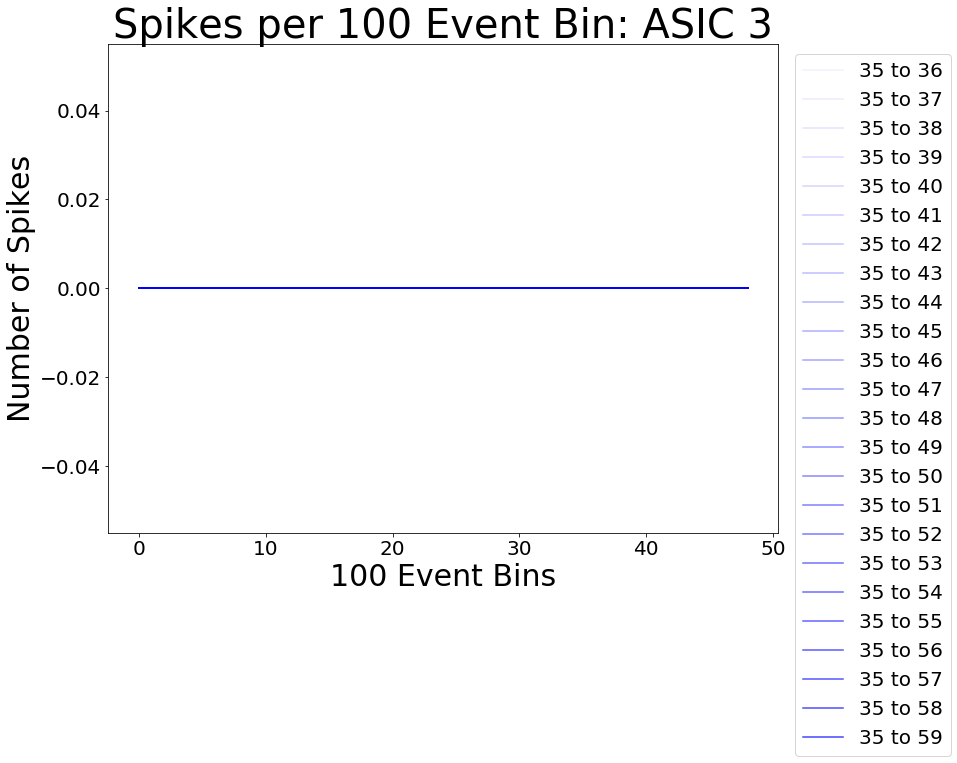

In [18]:
# Plot data spikes for each step for each ASIC

for ASIC in range(4):
    end_value = 36
    color = 0.05
    for run in range(320135,320159):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB1 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        time = []
        for i in range(100,5000,100):
            blocks = [data[event,3] for event in range(i-100,i,1) for number in range(5,133) if data[event,number]<100]
            time.append(len(blocks)) 
        plt.plot(time, label = '35 to ' + str(end_value), color = 'b', alpha = color)
        end_value = end_value + 1
        color = color + 0.03
    plt.title('Spikes per 100 Event Bin: ASIC ' + str(ASIC))
    plt.xlabel('100 Event Bins')
    plt.ylabel('Number of Spikes')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [ ]:
## Even Blocks Only ##

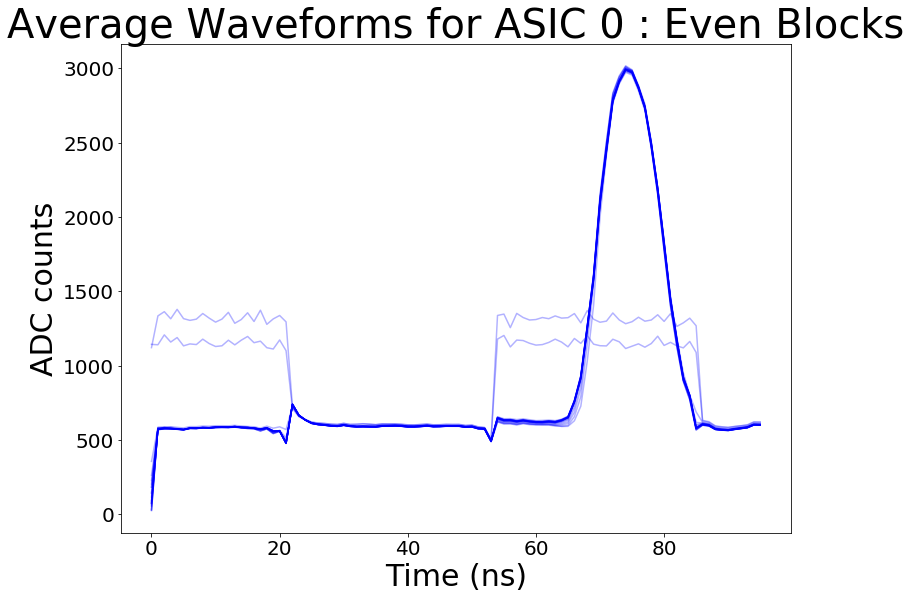

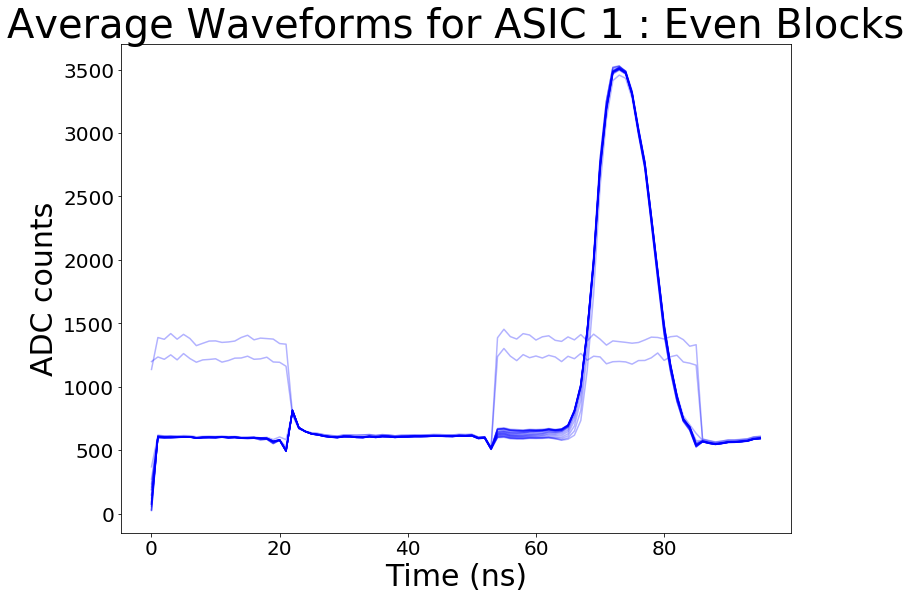

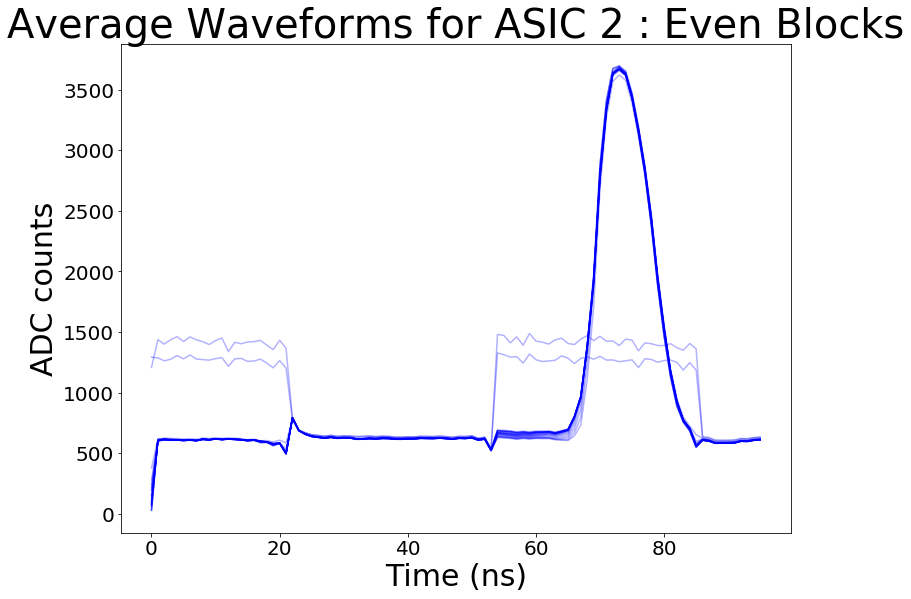

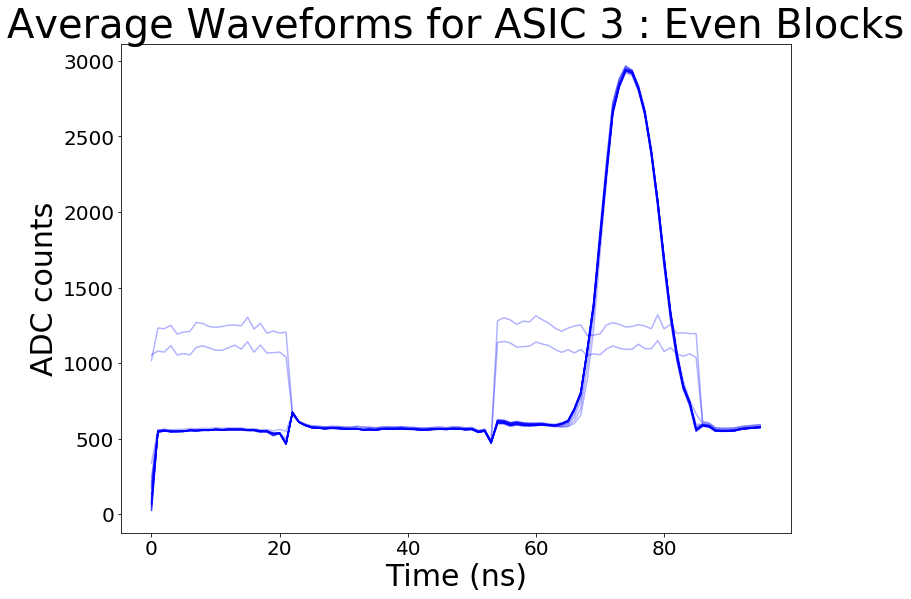

In [3]:
# Graph average waveform for only even blocks

STRB1_even = []
for ASIC in range(4):
    runs = []
    end_value = 36
    for run in range(320135,320159):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB1 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2==0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '35 to ' + str(end_value), color = 'b', alpha = 0.3)
        end_value = end_value + 1
    STRB1_even.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

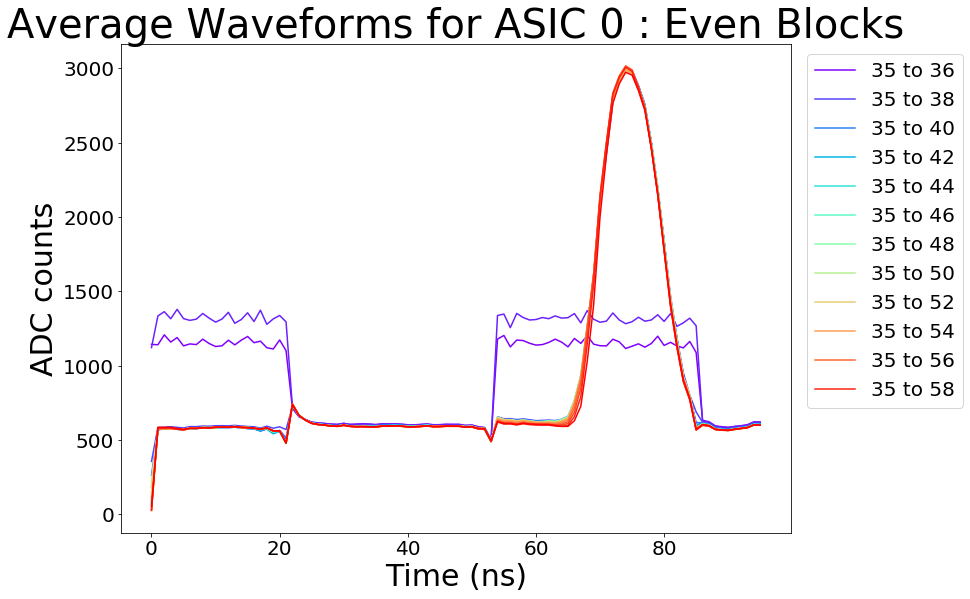

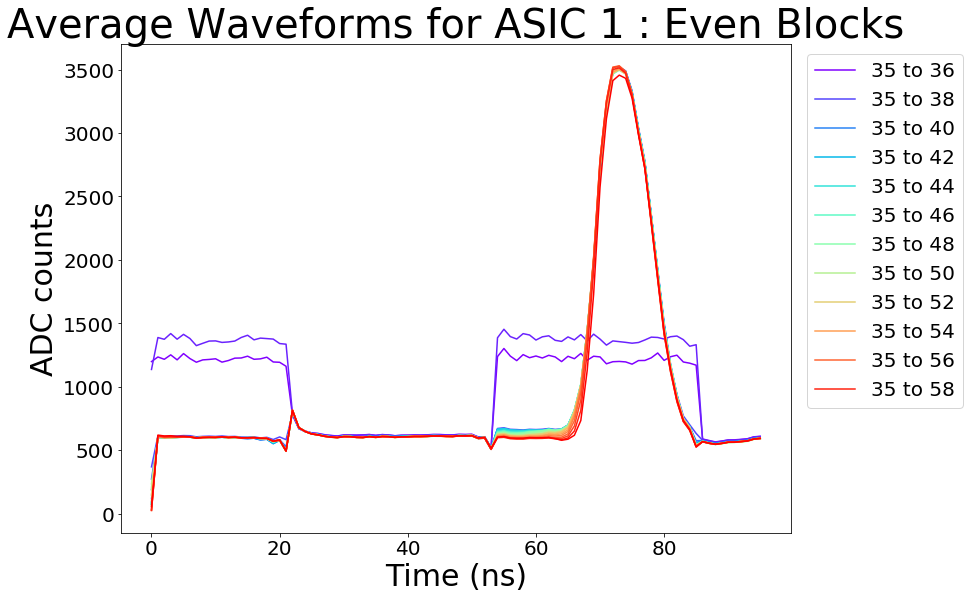

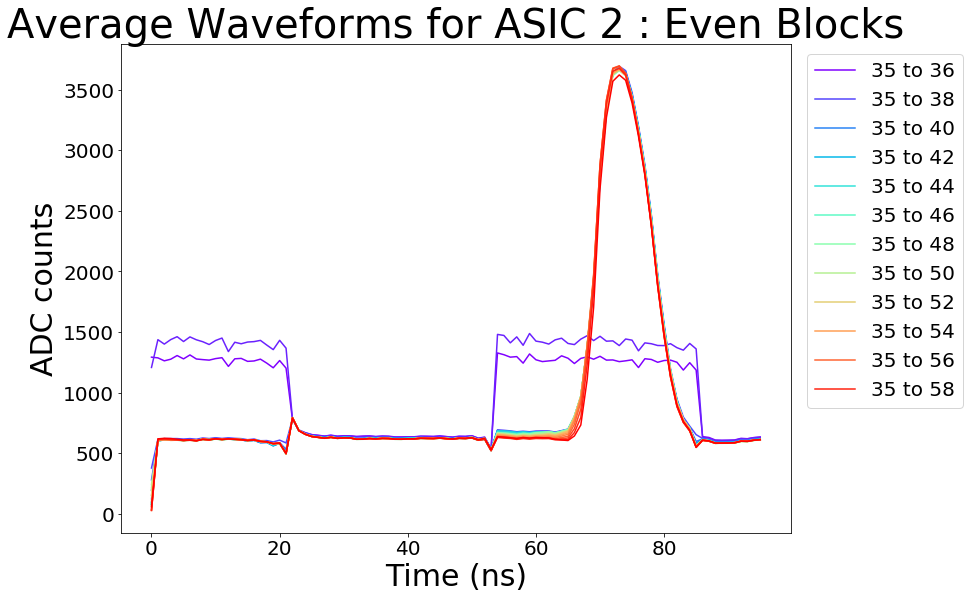

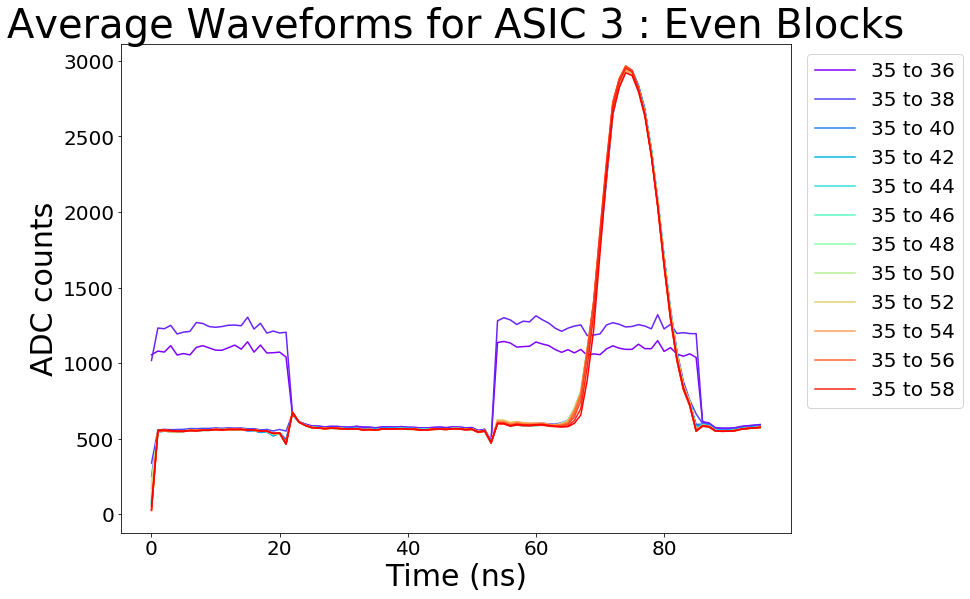

In [4]:
# Plot with rainbow colormap

number_runs = 24
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    end_value = 36
    for run in range(24):
        if run%2==0:
            plt.plot(STRB1_even[ASIC][run], label = '35 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(STRB1_even[ASIC][run], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

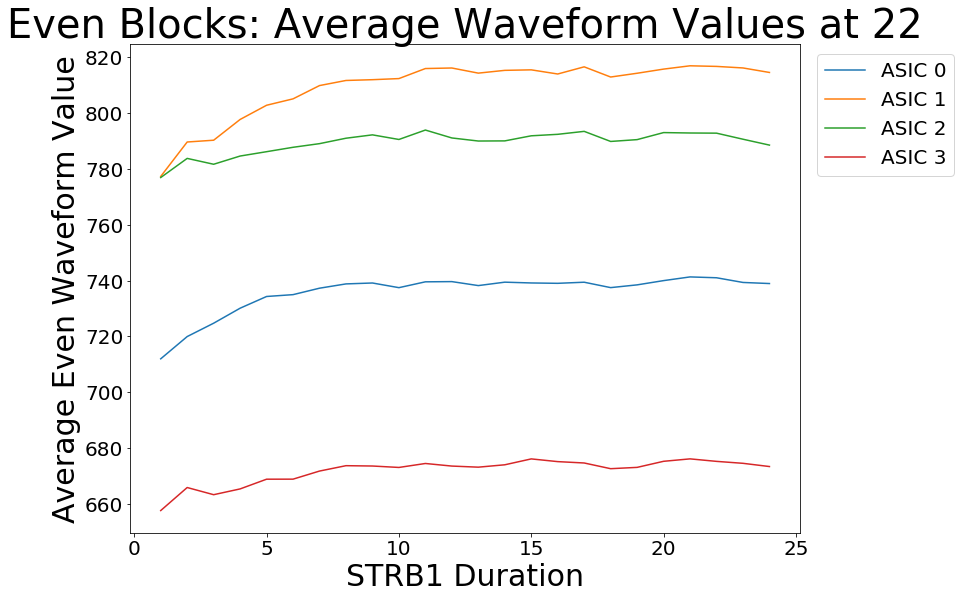

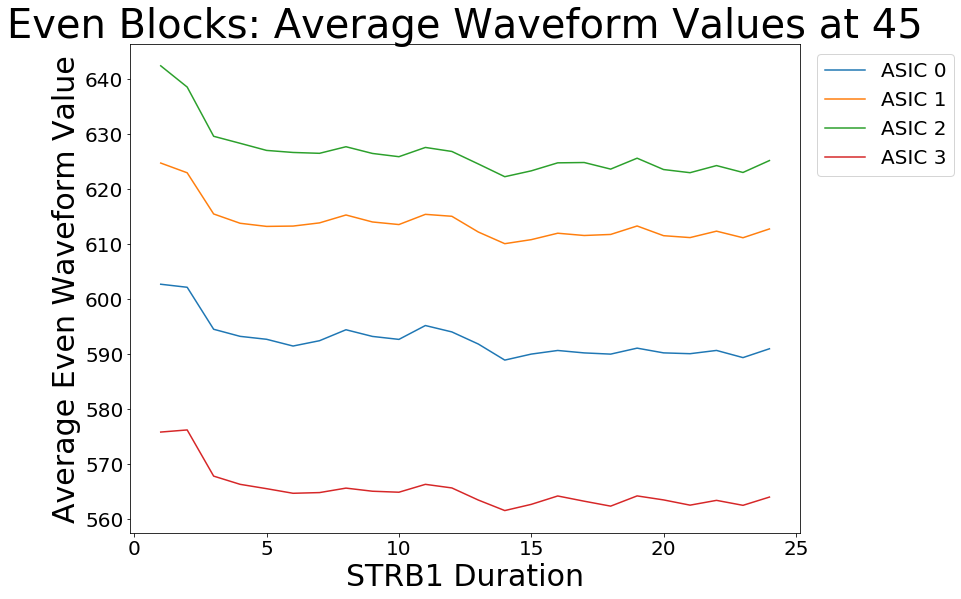

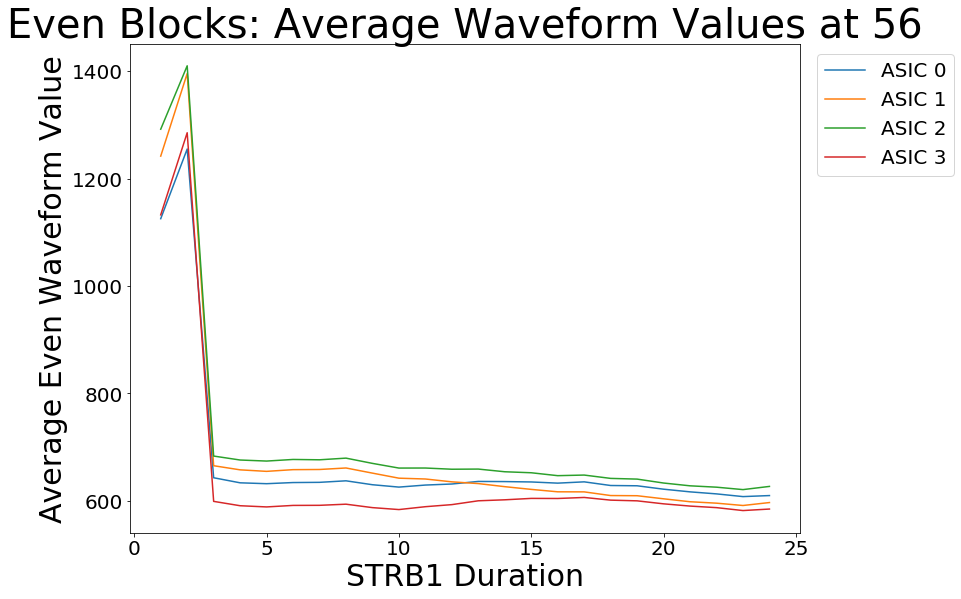

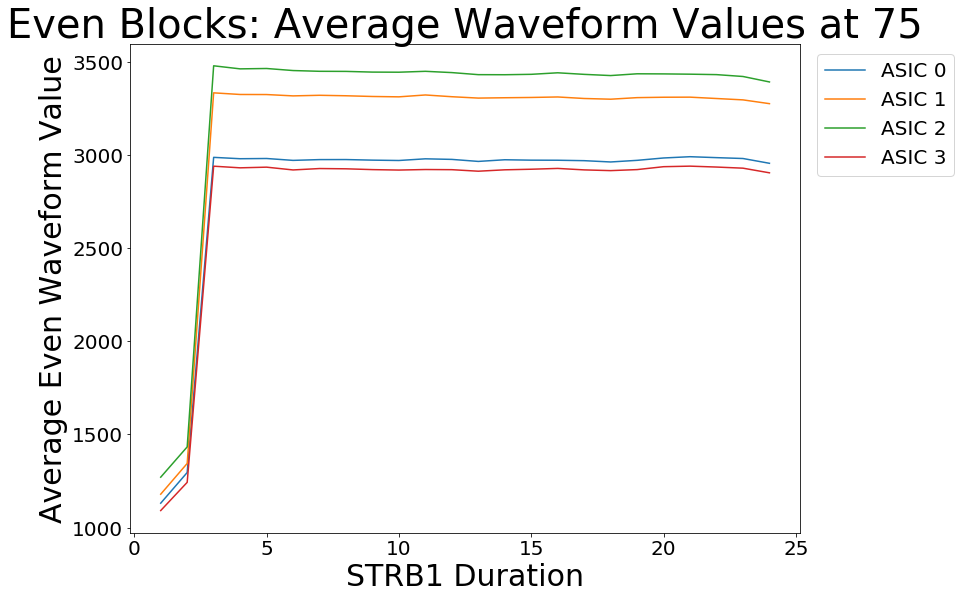

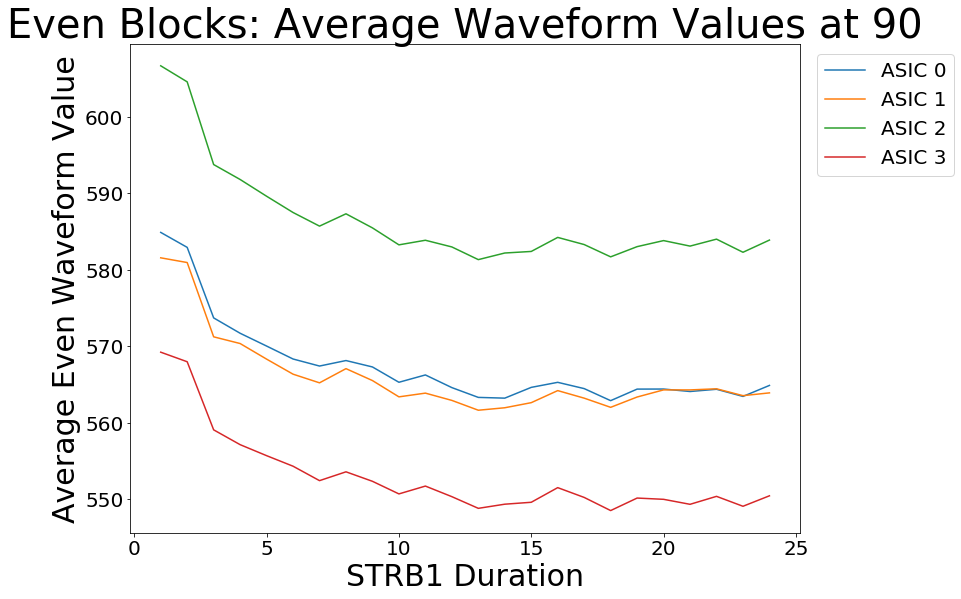

In [4]:
# Graph the value of each average waveform at 22, 56, 75, and 90. 
durations = [i for i in range(1,25)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_even[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 22')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_even[ASIC][run][45])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 45')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_even[ASIC][run][56])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 56')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_even[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 75')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_even[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 90')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [15]:
## Odd Blocks Only ##

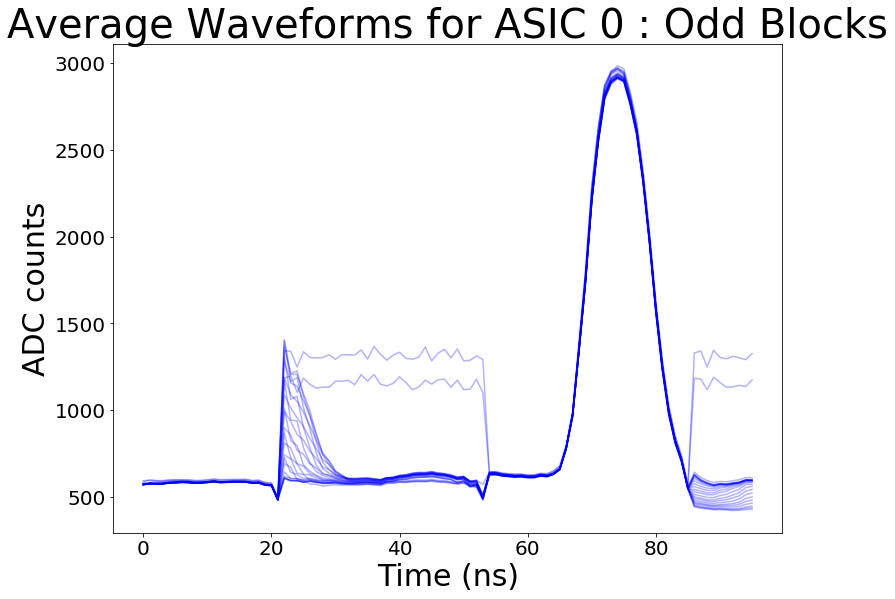

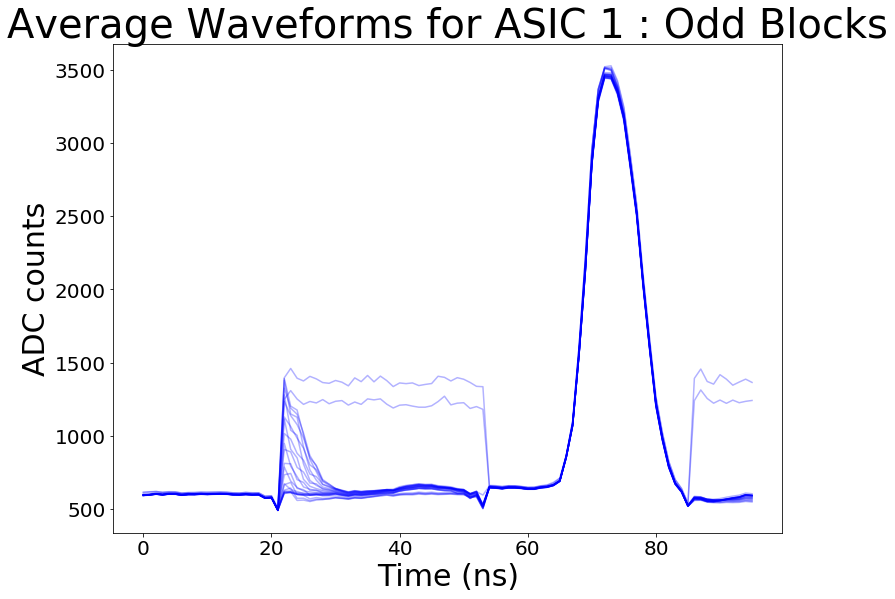

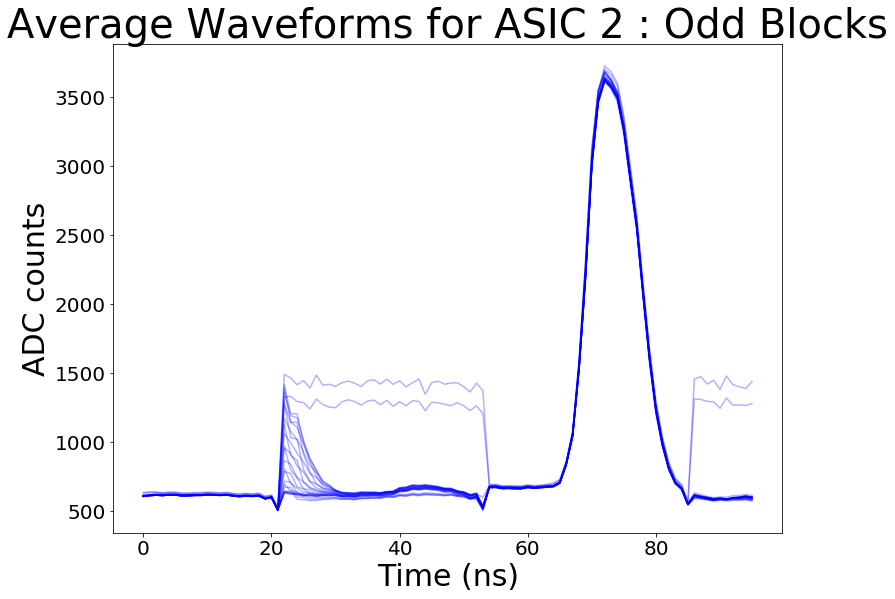

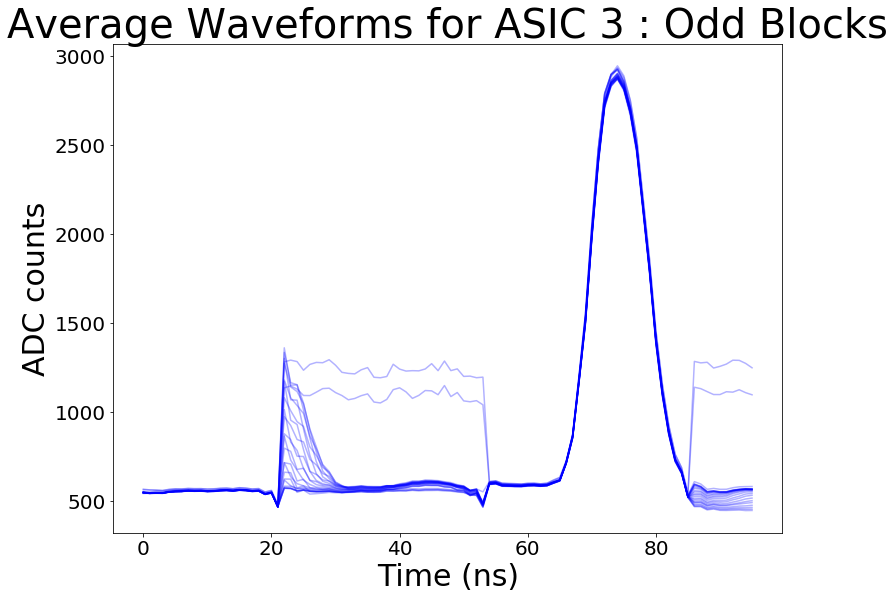

In [5]:
# Graph average waveform for only odd blocks

STRB1_odd = []
for ASIC in range(4):
    runs = []
    end_value = 36
    for run in range(320135,320159):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB1 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2!=0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '35 to ' + str(end_value), color = 'b', alpha = 0.3)
        end_value = end_value + 1
    STRB1_odd.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

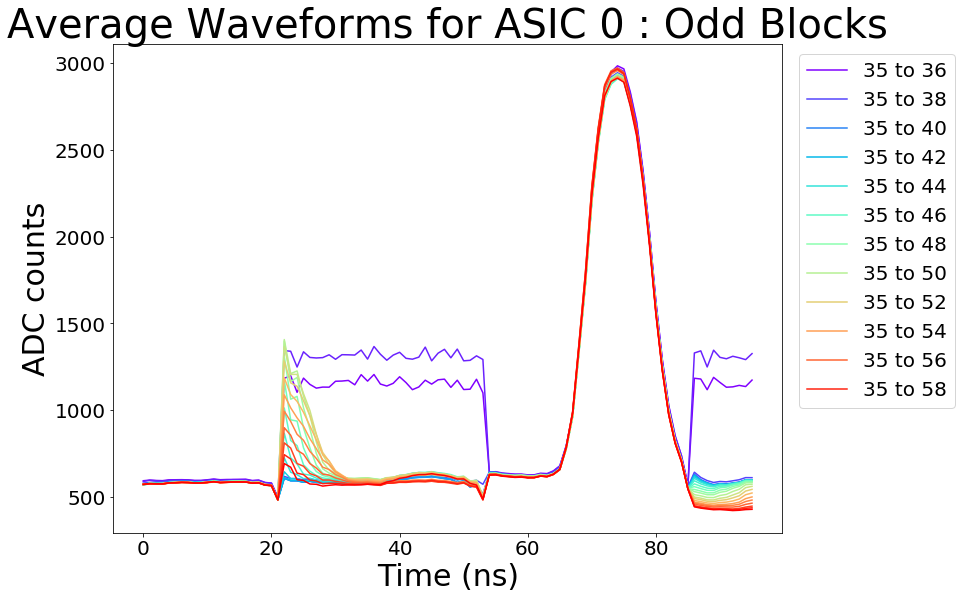

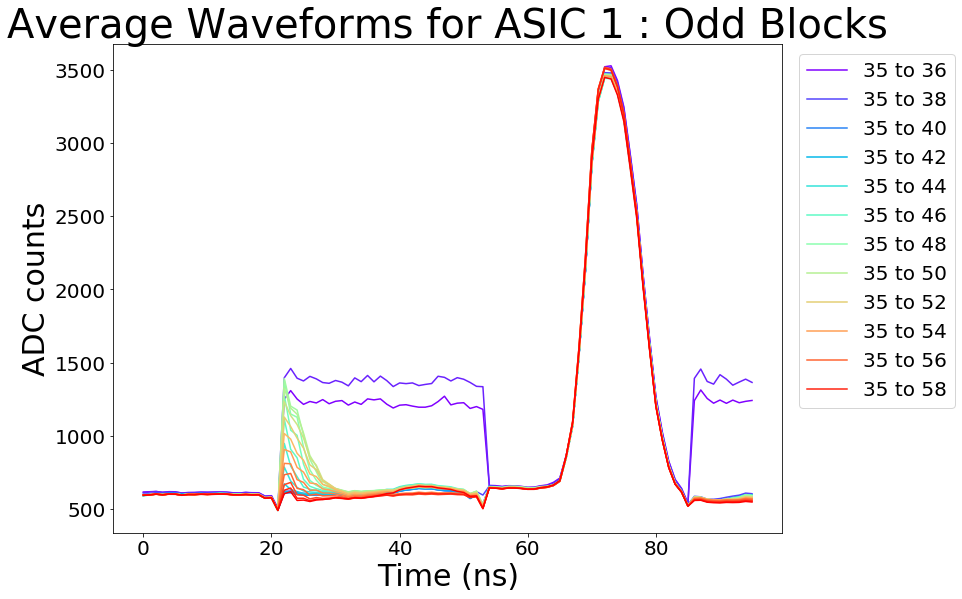

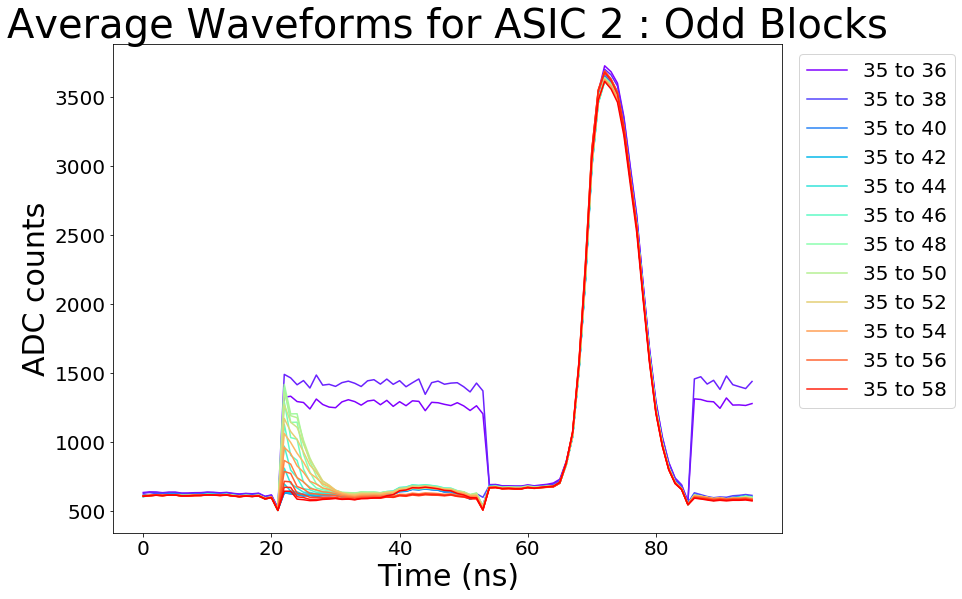

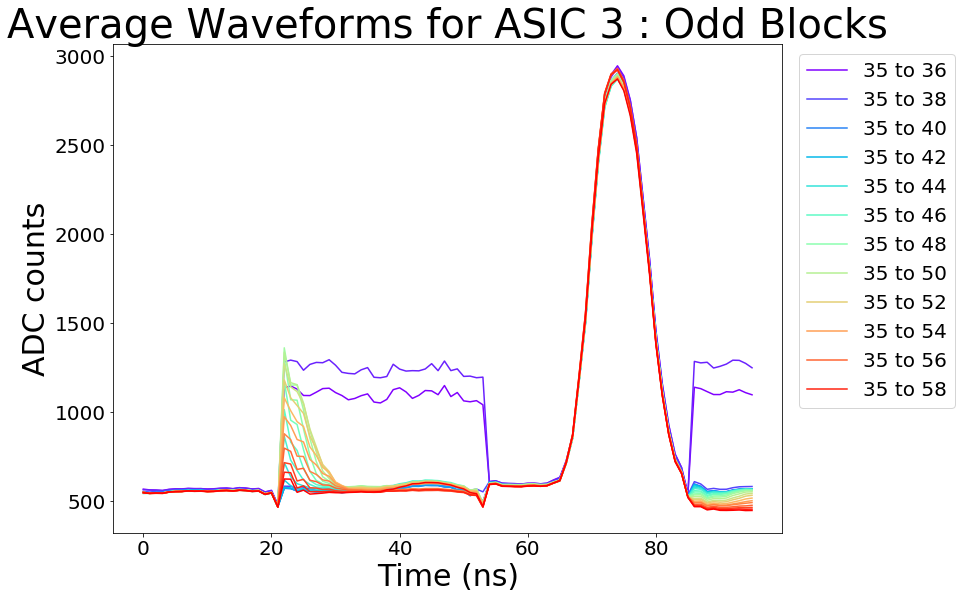

In [6]:
# Plot with rainbow colormap

number_runs = 24
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    end_value = 36
    for run in range(24):
        if run%2==0:
            plt.plot(STRB1_odd[ASIC][run], label = '35 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(STRB1_odd[ASIC][run], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

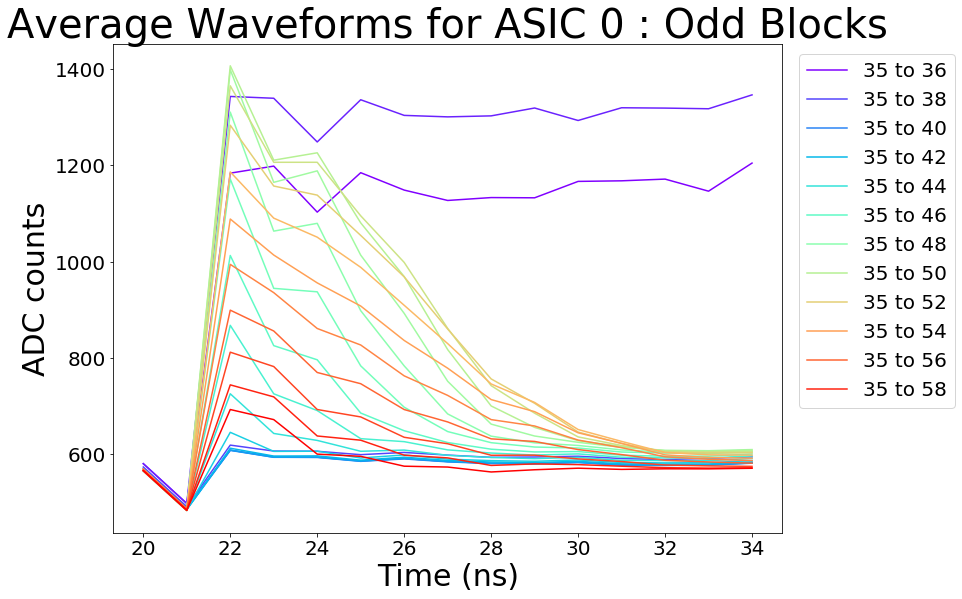

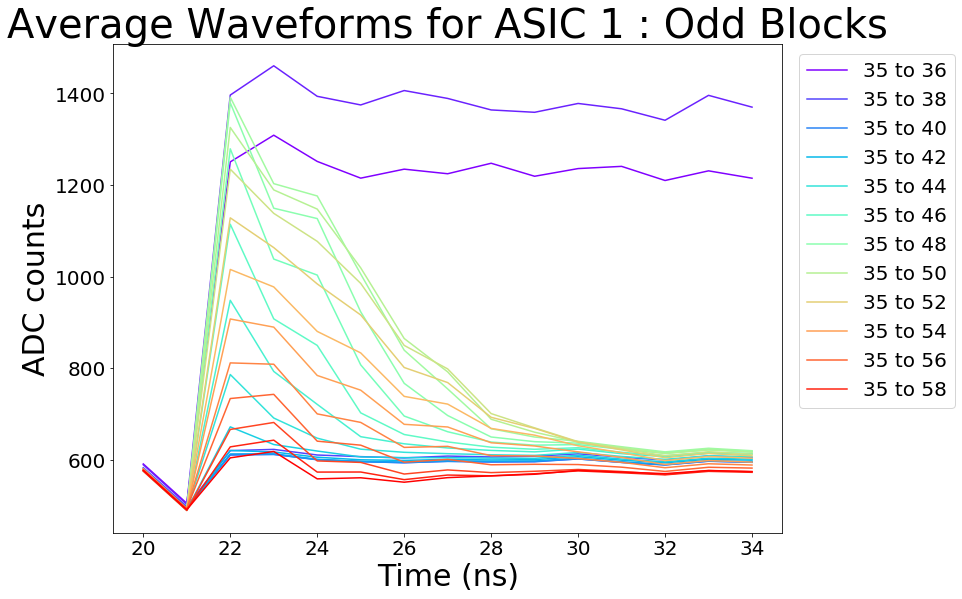

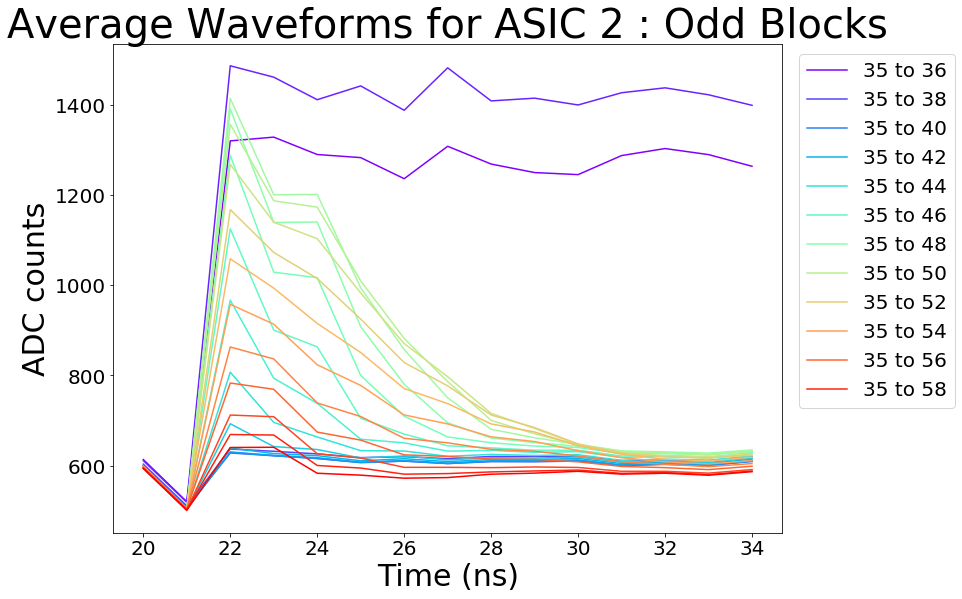

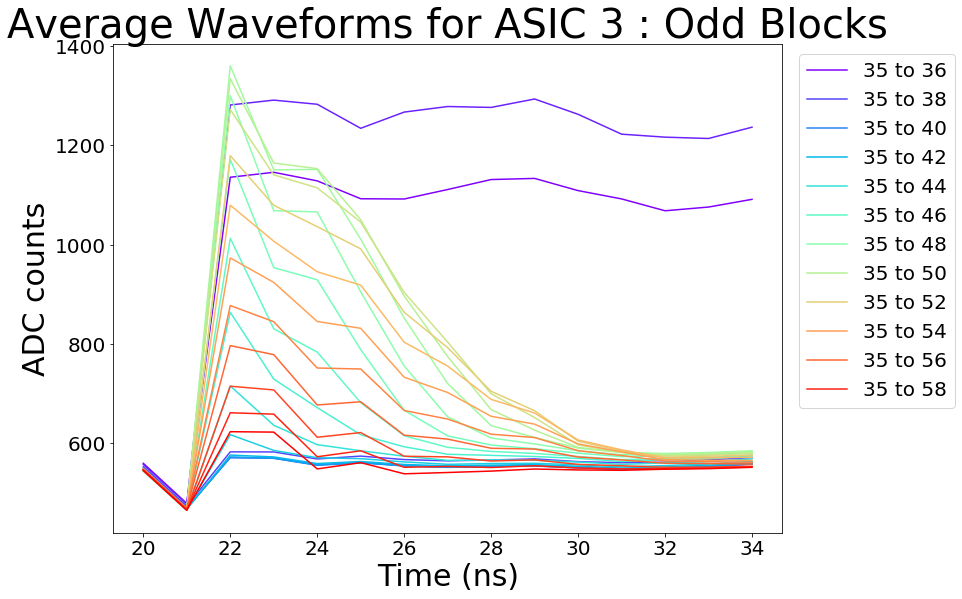

In [7]:
# Zoom in 20-35

number_runs = 24
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(20,35)]
for ASIC in range(4):
    end_value = 36
    for run in range(24):
        if run%2==0:
            plt.plot(time, STRB1_odd[ASIC][run][20:35], label = '35 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(time, STRB1_odd[ASIC][run][20:35], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

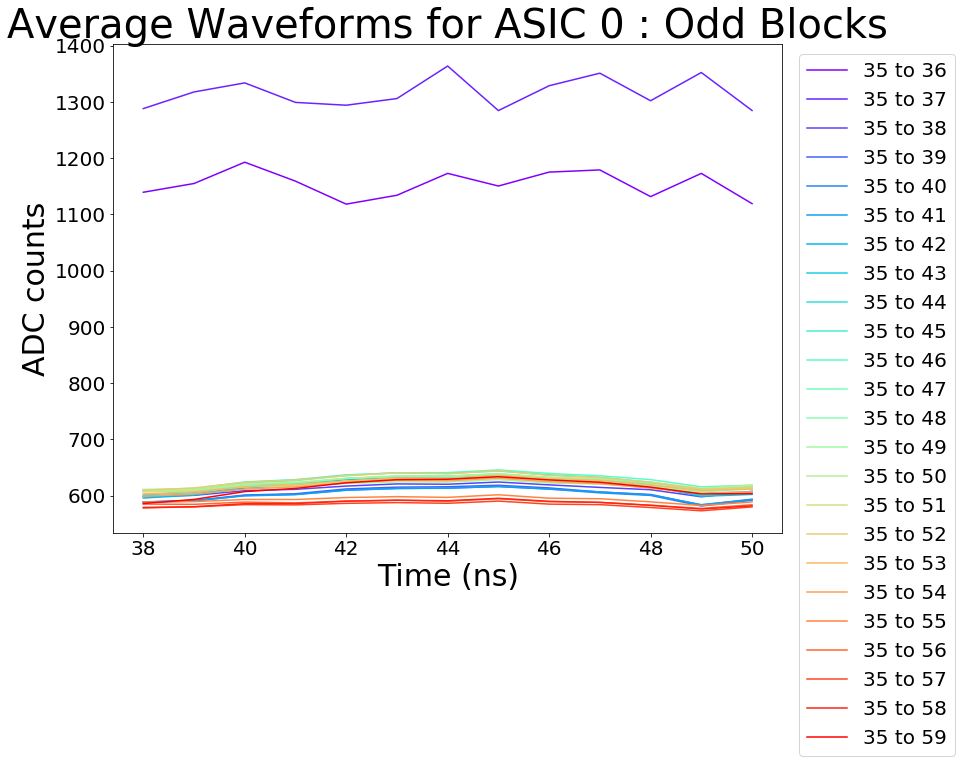

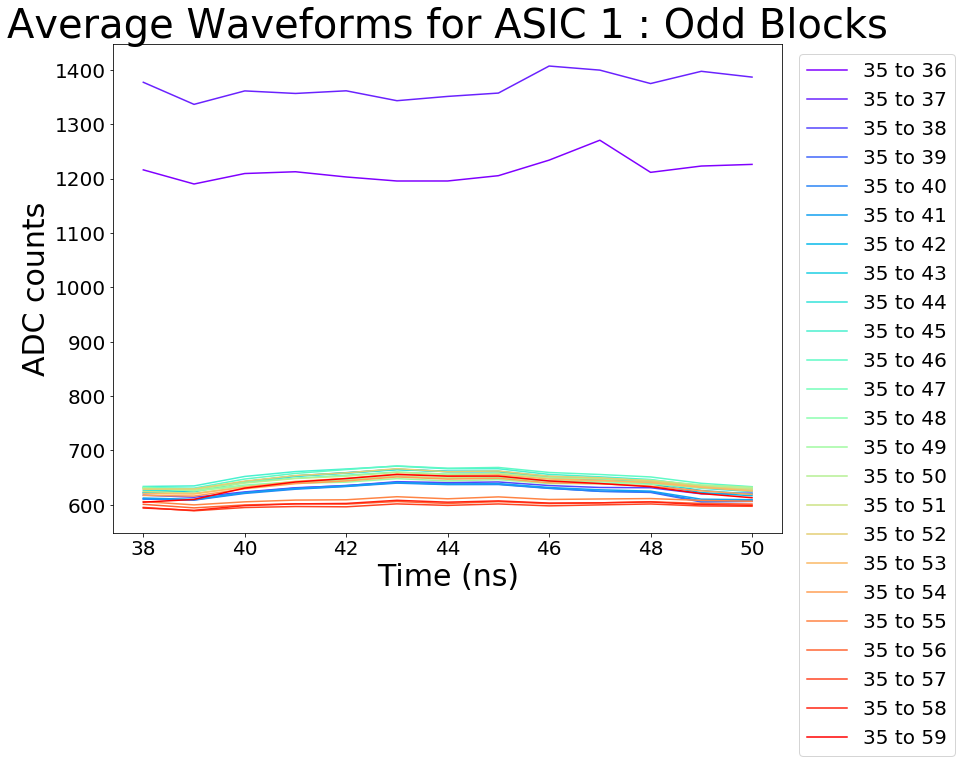

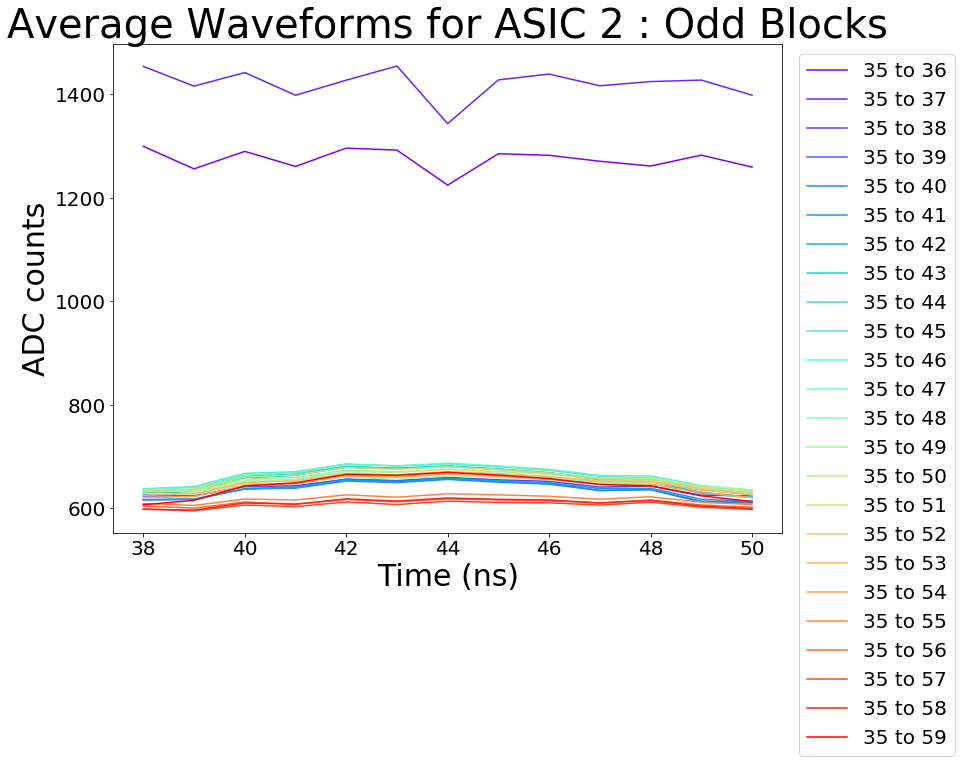

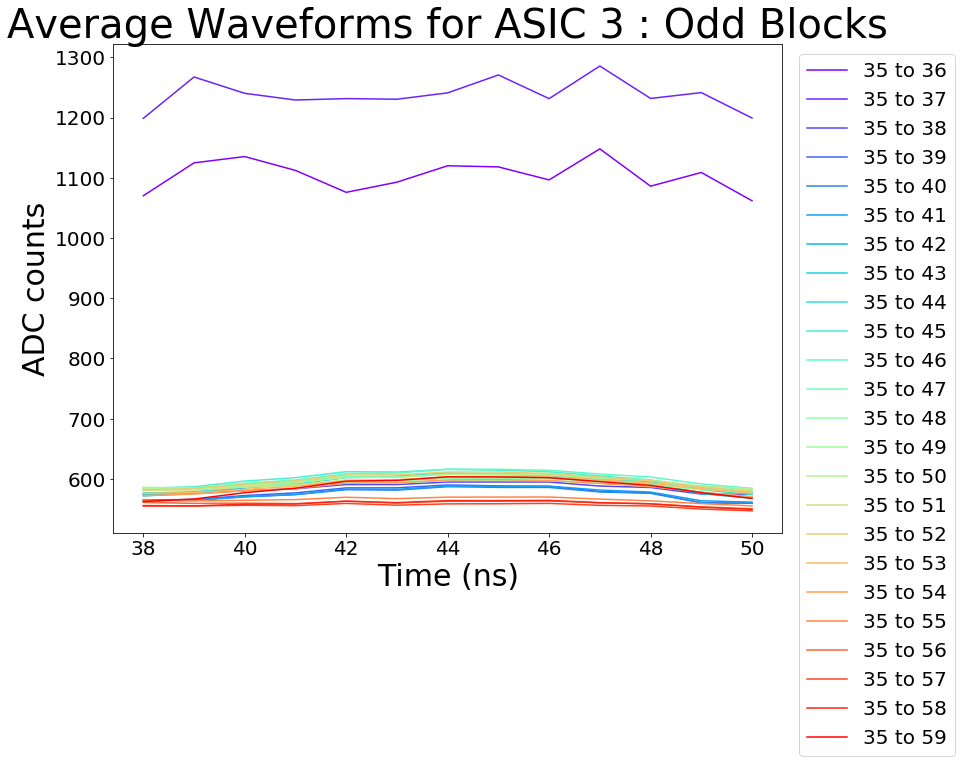

In [30]:
# Zoom in 38-51

number_runs = 24
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(38,51)]
for ASIC in range(4):
    end_value = 36
    for run in range(24):
        plt.plot(time, STRB1_odd[ASIC][run][38:51], label = '35 to ' + str(end_value), color = colors[run])
        end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

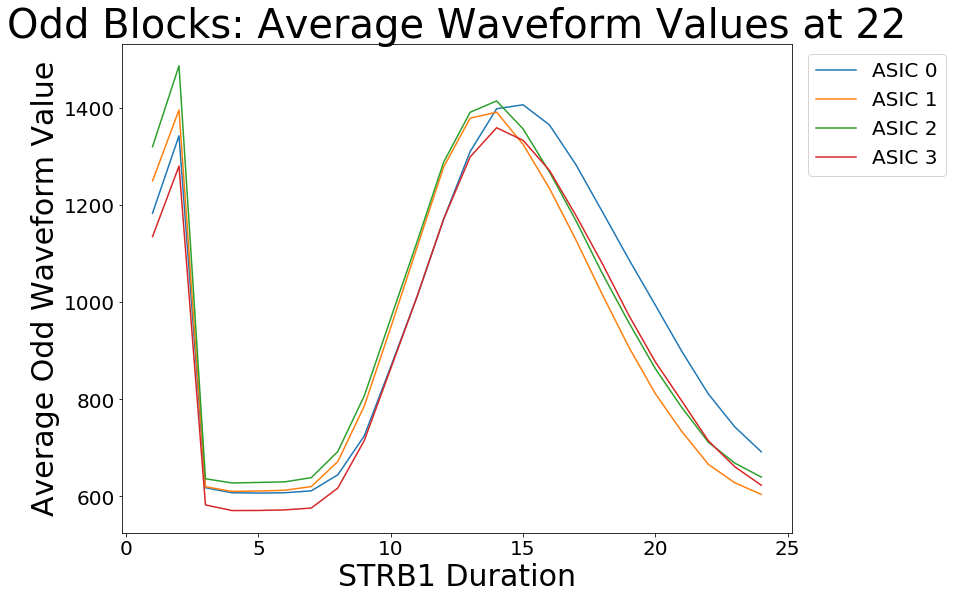

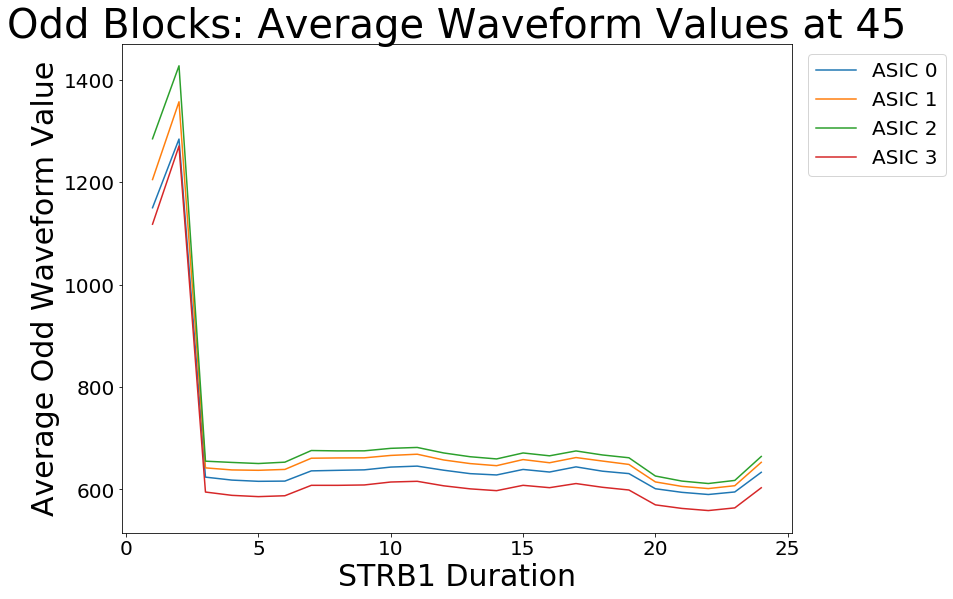

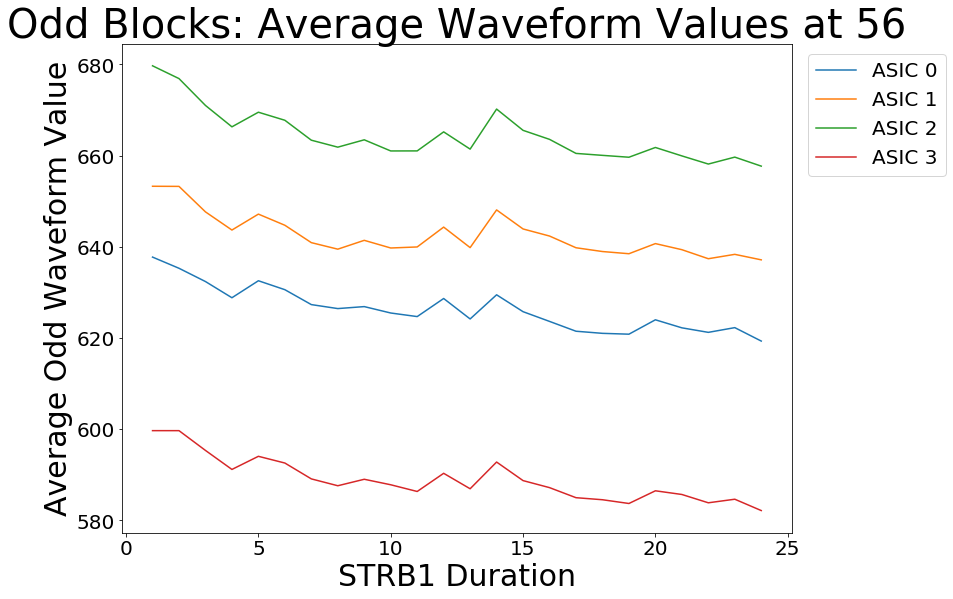

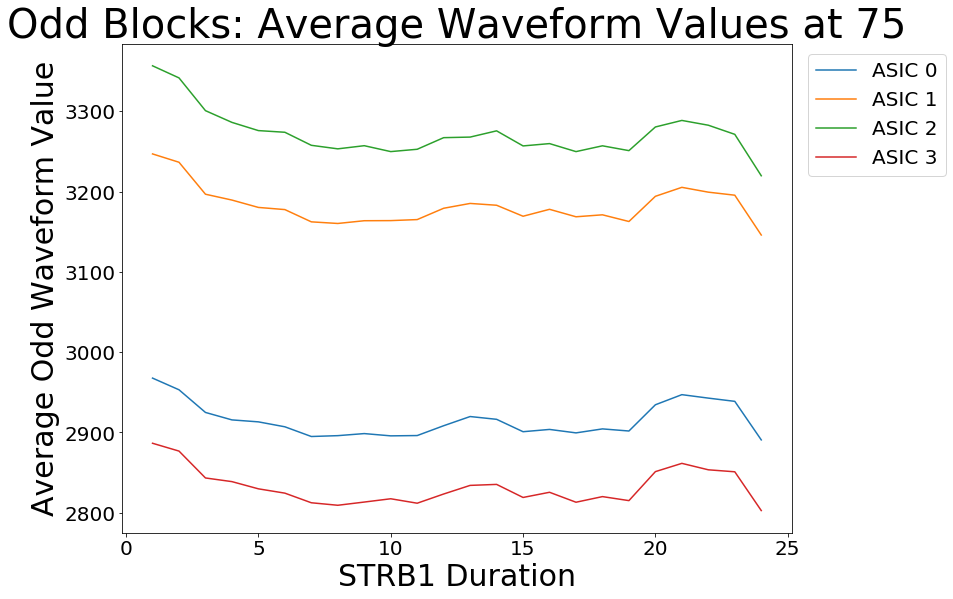

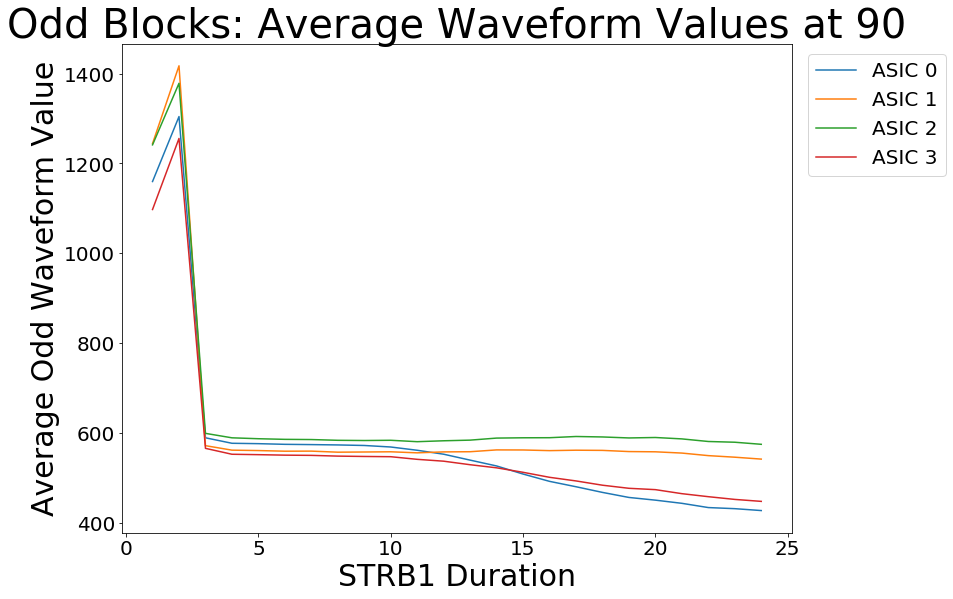

In [7]:
# Graph the value of each average waveform at 22, 56, 75, and 90. 
durations = [i for i in range(1,25)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_odd[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 22')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_odd[ASIC][run][45])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 45')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_odd[ASIC][run][56])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 56')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_odd[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 75')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(24):
        value.append(STRB1_odd[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 90')
plt.xlabel('STRB1 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [ ]:
# The best STRB1 duration seems to be 24 (35 - 59)
# The duration of STRB1 does not seem to affect data spikes